# EDA 진행

In [1]:
import IPython.display as display
from PIL import Image
import pathlib
import hashlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import glob

import cv2
from scipy.ndimage import label
import skimage.io as sk

from collections import Counter #중복을 세는 counter


%matplotlib inline

In [ ]:
# google mount한 다음에 사용하기
data_dir = '/content/drive/MyDrive/commit_folder/hs_dccproject/dataset'

# 경로 찾는 함수
def findfile(name, path):
  for dirpath, dirname, filename in os.walk(data_dir):
    if name in filename:
      return os.path.join(dirpath,name)

# 예시
a = findfile("aaawtqcodvawusbynobl.jpg","/")

# 라벨 확인
data_list = os.listdir(data_dir)

In [ ]:
file_path = [] # 각 라벨의 경로를 담을 파일
img_name = [] # 각 폴더 별 이미지 개수 저장 

for root, subdirs, files in os.walk(data_dir):
  if len(files)>0:
    print(root, len(files))
    root = root.split('/')[-1]
    file_path.append(root)
    img_name.append(len(files)) 
    
#폴더 별 파일 개수 확인 => 데이터 분포가 불균형하다

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_10 1893
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_12 518
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_15 1509
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_20 410
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_21 410
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_24 782
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_25 6189
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27 426
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_3 595
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_30 364
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_33 6206
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_34 419
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_39 454
/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_40 180
/content/drive/MyDrive/commit_f

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'file name': file_path,
    'length' : img_name
})
print(df)
result_t = sum(img_name)
df.plot(x = "file name", kind = 'bar')

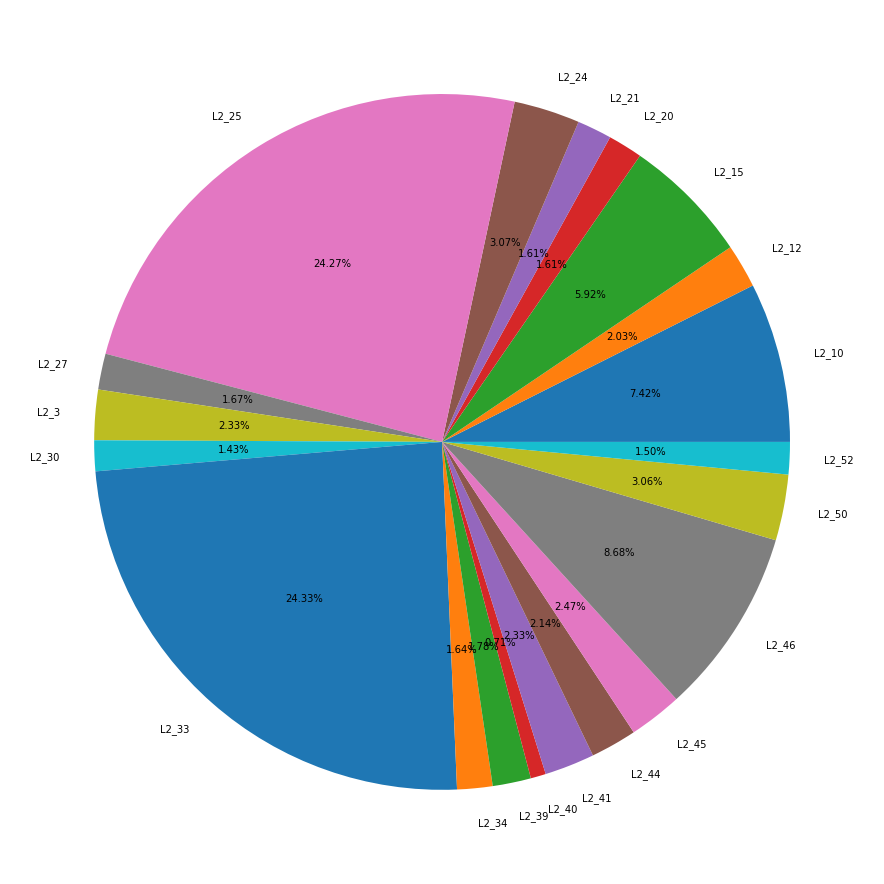

In [ ]:
# 위 리스트를 갖고 파이 그래프를 그리기
plt.figure(figsize = [16,16])
plt.pie(x = df['length'], 
           labels = df['file name'],
           autopct = '%.2f%%')
plt.show()

# 중복 제거 경로 DataFrame으로 만들기(전체 폴더)

***1. 중복제거처리한 최종 df = final_df***




In [ ]:
import os
import hashlib
import pandas as pd
import numpy as np
from PIL import Image
from collections import Counter #중복을 세는 counter


import matplotlib.pyplot as plt
import matplotlib.image as img


파일 L2_10, L2_11 등을 colname으로 하여 데이터프레임(df)를 만들고 각 col을 불러와서 처리함(NAN 값 삭제 필요)

In [ ]:
all_folder=pd.DataFrame()

for folder in os.listdir('/content/drive/MyDrive/commit_folder/hs_dccproject/dataset'):
  set_path='/content/drive/MyDrive/commit_folder/hs_dccproject/dataset'
  L2_N=os.path.join(set_path,folder)
  path_list = [] #사진파일(...jpg)의 경로를 담을 list
  for f in os.listdir(L2_N):
     if 'jpg' or 'png' in f:
     # 확인해본 결과 ㄹㅇ 파일이름만 나오기 때문에 앞 부분의 경로와 f를 합쳐야함.
       f_name = os.path.join(L2_N,f)
       path_list.append(f_name)#클래스 1개에 있는 모든 파일의 경로가 담겨있는 list
  path_df=pd.DataFrame(path_list, columns=[folder])
  all_folder=pd.concat([all_folder,path_df], axis=1) #for문을 돌리면서 좌우로 붙여감

all_folder.head()

,L2_10,L2_12,L2_15,L2_20,L2_21,L2_24,L2_25,L2_27,L2_3,L2_30,L2_33,L2_34,L2_39,L2_40,L2_41,L2_44,L2_45,L2_46,L2_50,L2_52
0,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
1,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
2,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
3,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive

In [ ]:
all_folder.shape #가장 큰 파일인 L2_33파일(6206개의 사진파일 존재)을 기준으로 df를 만듦.

(6206, 20)

In [ ]:
data=f.read( )

***********
 L2_10 에 대한 중복데이터

L2_10 의 총 이미지 개수 : 1893
L2_10 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  1893
중복제거 파일의 수 :  1893
중복을 제거한 최종 df.shape :  (1893, 1) 


***********
 L2_12 에 대한 중복데이터

L2_12 의 총 이미지 개수 : 518
L2_12 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  518
중복제거 파일의 수 :  518
중복을 제거한 최종 df.shape :  (1893, 2) 


***********
 L2_15 에 대한 중복데이터

L2_15 의 총 이미지 개수 : 1509
L2_15 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  1509
중복제거 파일의 수 :  1509
중복을 제거한 최종 df.shape :  (1893, 3) 


***********
 L2_20 에 대한 중복데이터

L2_20 의 총 이미지 개수 : 410
L2_20 에서 중복 데이터의 hash, 갯수 :  [['7117fd483d08b446a6bf9383e93f7f6c', 2]]
[163, 169]
중복데이터의 인덱스 :  [[163, 169]]
기존 파일의 수 :  410
중복제거 파일의 수 :  409
중복을 제거한 최종 df.shape :  (1893, 4) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_20/mkvssezrfdkcqgtgwgsl.png


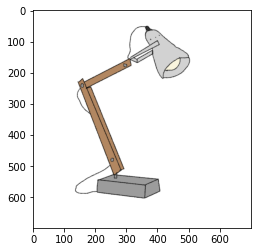

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_20/inkjcprnlkzplhqgvywk.png


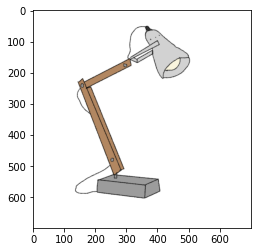

*****여기까지 중복*****



***********
 L2_21 에 대한 중복데이터

L2_21 의 총 이미지 개수 : 410
L2_21 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  410
중복제거 파일의 수 :  410
중복을 제거한 최종 df.shape :  (1893, 5) 


***********
 L2_24 에 대한 중복데이터

L2_24 의 총 이미지 개수 : 782
L2_24 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  782
중복제거 파일의 수 :  782
중복을 제거한 최종 df.shape :  (1893, 6) 


***********
 L2_25 에 대한 중복데이터

L2_25 의 총 이미지 개수 : 6189
L2_25 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  6189
중복제거 파일의 수 :  6189
중복을 제거한 최종 df.shape :  (6189, 7) 


***********
 L2_27 에 대한 중복데이터

L2_27 의 총 이미지 개수 : 426
L2_27 에서 중복 데이터의 hash, 갯수 :  [['62ff0d0b21a5000c2d0776544cff8527', 2], ['481e06816274681579f938c354ae184c', 2], ['2fae9007579c6722fe285ae73a8719bd', 2]]
[133, 138]
[142, 145]
[278, 280]
중복데이터의 인덱스 :  [[133, 138], [142, 145], [278, 280]]
기존 파일의 수 :  426
중복제거 파일의 수 :  423
중복을 제거한 최종 df.shape :  (6189, 8) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/wxnmgfgynrdjugycktqq.jpg


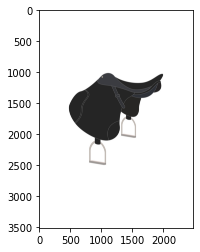

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/pzlhvmswljrhzyliktgt.jpg


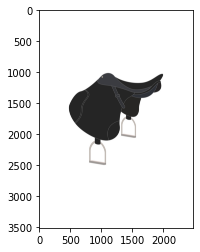

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/emolvirlnkvuzadyobyz.jpg


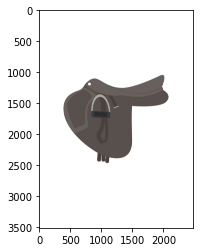

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/iahdnnwxqusffouscleo.jpg


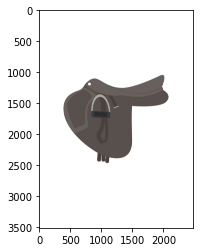

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/tpicijctxcuijjrhzbqa.png


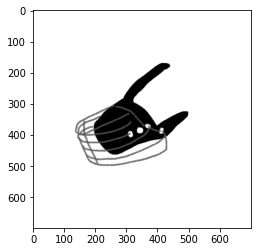

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_27/somgkjnrmovrgvtesjcw.png


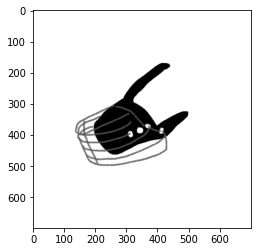

*****여기까지 중복*****



***********
 L2_3 에 대한 중복데이터

L2_3 의 총 이미지 개수 : 595
L2_3 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  595
중복제거 파일의 수 :  595
중복을 제거한 최종 df.shape :  (6189, 9) 


***********
 L2_30 에 대한 중복데이터

L2_30 의 총 이미지 개수 : 364
L2_30 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  364
중복제거 파일의 수 :  364
중복을 제거한 최종 df.shape :  (6189, 10) 


***********
 L2_33 에 대한 중복데이터

L2_33 의 총 이미지 개수 : 6206
L2_33 에서 중복 데이터의 hash, 갯수 :  [['493d46a69480282e0a092cd2af767e8c', 2], ['496dcf74a941acf83b688491ad6c930c', 2]]
[5213, 5214]
[6099, 6100]
중복데이터의 인덱스 :  [[5213, 5214], [6099, 6100]]
기존 파일의 수 :  6206
중복제거 파일의 수 :  6204
중복을 제거한 최종 df.shape :  (6204, 11) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_33/worfuusrmlylxiljinlt.png


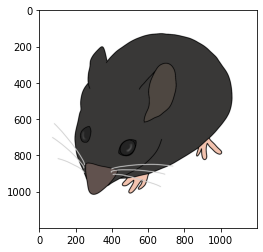

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_33/qlmfgkkgkpzqttzihars.png


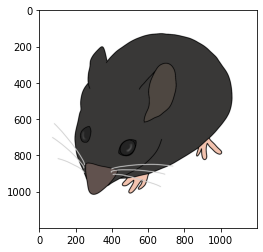

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_33/excrkyykmmzuqxhxpclg.jpg


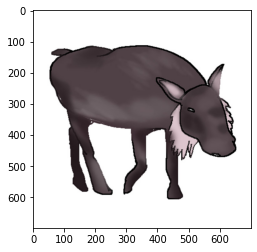

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_33/ugeonpkjmrssdwtlltbg.jpg


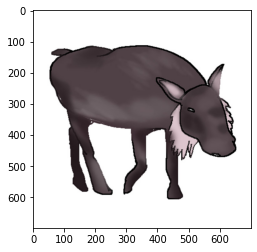

*****여기까지 중복*****



***********
 L2_34 에 대한 중복데이터

L2_34 의 총 이미지 개수 : 419
L2_34 에서 중복 데이터의 hash, 갯수 :  [['78681bb3ef93ba0b7007155ebcf06d4c', 2]]
[110, 389]
중복데이터의 인덱스 :  [[110, 389]]
기존 파일의 수 :  419
중복제거 파일의 수 :  418
중복을 제거한 최종 df.shape :  (6204, 12) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_34/wbbsviijempmbpgytqbk.jpg


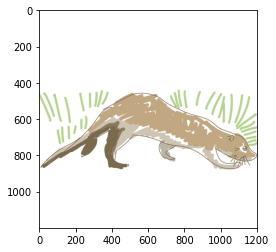

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_34/rcfwrxxxtxikeyglpqpq.jpg


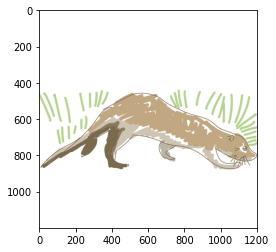

*****여기까지 중복*****



***********
 L2_39 에 대한 중복데이터

L2_39 의 총 이미지 개수 : 454
L2_39 에서 중복 데이터의 hash, 갯수 :  [['83fd0fda5ecfc0dd2f2d3f077eb48d24', 2], ['af7ebe59c049c663ee506331444e1252', 2]]
[63, 65]
[91, 143]
중복데이터의 인덱스 :  [[63, 65], [91, 143]]
기존 파일의 수 :  454
중복제거 파일의 수 :  452
중복을 제거한 최종 df.shape :  (6204, 13) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_39/iowzezyckipyaaaylbku.png


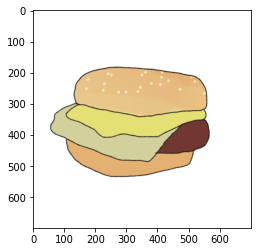

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_39/ktvqilqsnmjszsgcbkgw.png


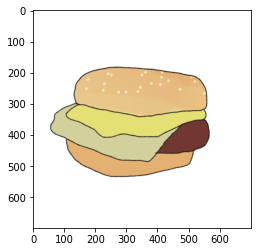

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_39/odzonrglztfprbsjzuxr.jpg


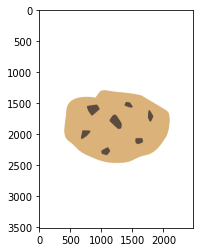

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_39/yuscprwyajcjkpndvlyu.jpg


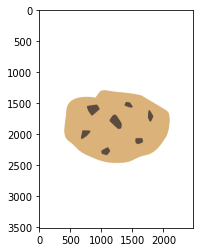

*****여기까지 중복*****



***********
 L2_40 에 대한 중복데이터

L2_40 의 총 이미지 개수 : 180
L2_40 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  180
중복제거 파일의 수 :  180
중복을 제거한 최종 df.shape :  (6204, 14) 


***********
 L2_41 에 대한 중복데이터

L2_41 의 총 이미지 개수 : 593
L2_41 에서 중복 데이터의 hash, 갯수 :  [['a6562309115d0661e6391954fd3e7ea5', 2], ['5f60a2f246fecb6400d493319fc29599', 2], ['8581ad85380b0bc7ac84bfb2848aadad', 2]]
[82, 110]
[130, 134]
[144, 148]
중복데이터의 인덱스 :  [[82, 110], [130, 134], [144, 148]]
기존 파일의 수 :  593
중복제거 파일의 수 :  590
중복을 제거한 최종 df.shape :  (6204, 15) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/sowalswsggfbaxdmsrnu.png


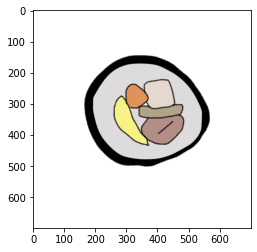

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/gryccdquckitpmclluhk.png


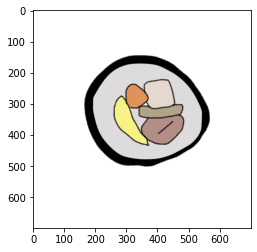

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/bxuehkmddlwkfkvthafz.jpg


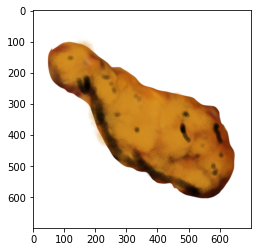

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/pllgvwcfjhstthxdsbuw.jpg


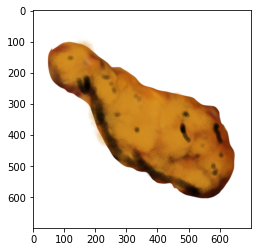

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/ficravjkqaghcvoresyw.jpg


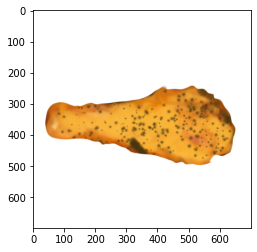

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_41/yxtxwawodpbozadexchs.jpg


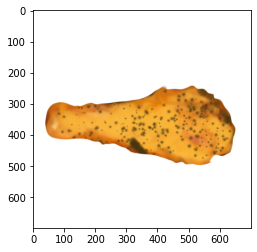

*****여기까지 중복*****



***********
 L2_44 에 대한 중복데이터

L2_44 의 총 이미지 개수 : 547
L2_44 에서 중복 데이터의 hash, 갯수 :  [['c71d4b65acaa1013bb7446d85568ecc9', 2], ['83fad8608b56b7337d09c22200555392', 2]]
[406, 407]
[471, 473]
중복데이터의 인덱스 :  [[406, 407], [471, 473]]
기존 파일의 수 :  547
중복제거 파일의 수 :  545
중복을 제거한 최종 df.shape :  (6204, 16) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_44/dvyfipmkbvgynxnmuaup.jpg


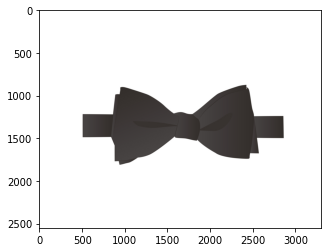

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_44/pvgzkipcacbbuafjicqk.jpg


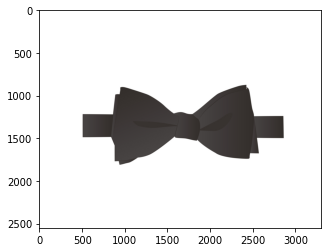

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_44/gapiznwxpckdmexrjwnw.jpg


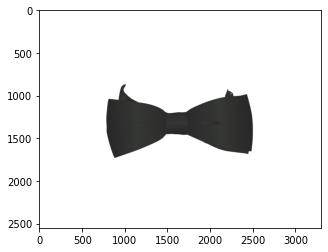

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_44/xdwbwaphedebxondzixq.jpg


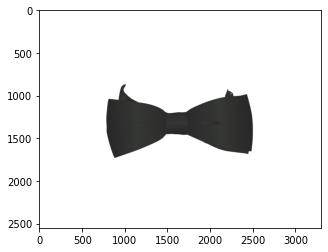

*****여기까지 중복*****



***********
 L2_45 에 대한 중복데이터

L2_45 의 총 이미지 개수 : 631
L2_45 에서 중복 데이터의 hash, 갯수 :  [['3af3d78f6193509bd90716b4373c163b', 2], ['6ba3808f0f05ee8a8798e8d9ee92c375', 2], ['16f42571c438fc7b9a3fc91d41a3be92', 2]]
[189, 255]
[504, 510]
[586, 587]
중복데이터의 인덱스 :  [[189, 255], [504, 510], [586, 587]]
기존 파일의 수 :  631
중복제거 파일의 수 :  628
중복을 제거한 최종 df.shape :  (6204, 17) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/slvplxmfohkruhjsnucy.jpg


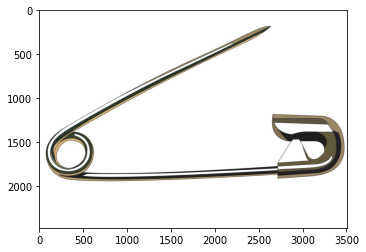

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/yrjombaghfdewddrglej.jpg


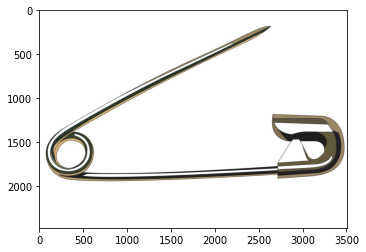

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/uxfcrexnlnwmzkvdgciu.png


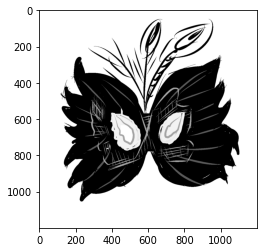

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/bfnfdcpgdciqticorbzn.png


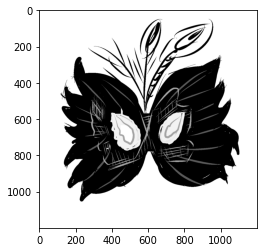

*****여기까지 중복*****



/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/rydkugwohojnnmmlwbst.jpg


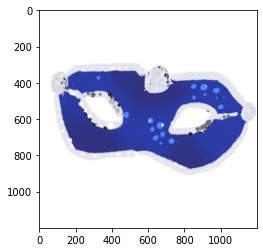

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_45/dyljteichybrszmlwsoh.jpg


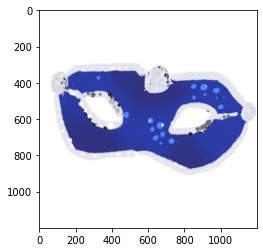

*****여기까지 중복*****



***********
 L2_46 에 대한 중복데이터

L2_46 의 총 이미지 개수 : 2214
L2_46 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  2214
중복제거 파일의 수 :  2214
중복을 제거한 최종 df.shape :  (6204, 18) 


***********
 L2_50 에 대한 중복데이터

L2_50 의 총 이미지 개수 : 781
L2_50 에서 중복 데이터의 hash, 갯수 :  [['8550faaa14e4759898477e9450a27323', 2]]
[188, 199]
중복데이터의 인덱스 :  [[188, 199]]
기존 파일의 수 :  781
중복제거 파일의 수 :  780
중복을 제거한 최종 df.shape :  (6204, 19) 


/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_50/glbazeprqvpwfaicdllc.jpg


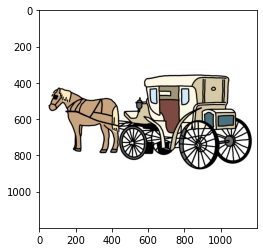

/content/drive/MyDrive/commit_folder/hs_dccproject/dataset/L2_50/uqenjppbjstmrfefouda.jpg


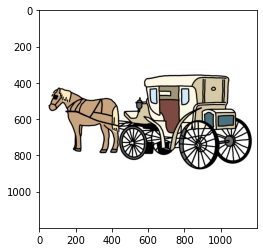

*****여기까지 중복*****



***********
 L2_52 에 대한 중복데이터

L2_52 의 총 이미지 개수 : 382
L2_52 에서 중복 데이터의 hash, 갯수 :  []
중복데이터의 인덱스 :  []
기존 파일의 수 :  382
중복제거 파일의 수 :  382
중복을 제거한 최종 df.shape :  (6204, 20) 




In [ ]:
folder_name=all_folder.columns.values.tolist()
final_df=pd.DataFrame()
for i in range(20): #하나의 col을 불러옴(L2_N) : 전체코드를 포함하는 for문,indent 주의
  path= all_folder.iloc[:,[i]]
  path=path.dropna(axis=0)
  path_list=path.values.tolist()
  col=folder_name[i]
  print("***********\n",col,"에 대한 중복데이터\n")

  hash_md=[]
  for x in path_list:
    x=x[0]
    f = open(x, 'rb')
    data=f.read()
    f.close()
    md5 = hashlib.md5(data).hexdigest()
    hash_md.append(md5)
  print(col,"의 총 이미지 개수 :",len(hash_md))
  
  #겹치는 hash 인덱스 뽑기
  md_dict = Counter(hash_md) #key = hash_id // value =  겹치는 hash id에 대한 중복 카운팅
  mdup_list=[]#키값과 밸루 값을 넣을 리스트로 최종 리스트(2차 리스트)
  sum = 0
  for key, value in md_dict.items():
    first_result=[] #중복된 키값과 그 밸루 값을 리스트로 묶어줄 1차원 리스트(1차 리스트)
    if value >= 2:
      first_result.append(key)#hash_id
      first_result.append(value)#중복된 수
      sum = sum + value #중복된 사진의 갯수 = sum
      mdup_list.append(first_result)

  print(col,"에서 중복 데이터의 hash, 갯수 : ",mdup_list) #중복데이터의 해쉬값과 그 개수

  mdup_hashid=[] #중복된 데이터의 해쉬값

  for x,y in mdup_list:
    mdup_hashid.append(x)

  #정말 중복인지 확인하기 위해서 hash값의 주소를 다시 역추적
  #처음에 만든 withpath->onlyhash(hash값만 할당해둔 list)에서 중복된 hash값이 같으면 주소값을 불러와서 plt
  mdup_index = []
  for y in mdup_hashid:
    rest_list = list(filter(lambda x: hash_md[x] == y, range(len(hash_md))))
    print(rest_list)
    mdup_index.append(rest_list)
  
  print("중복데이터의 인덱스 : ",mdup_index)

  

  #중복이 제거된 데이터셋을 데이터프레임에 저장
  final_df=pd.DataFrame()

  list_dup_X=list(range(len(hash_md)))#사진파일의 숫자를 range범위에 넣음 : L10의 경우 1893개
  print("기존 파일의 수 : ",len(list_dup_X))

  one_dup=[] #n개 이상 중복일 때 한개만 인덱스를 남겨두는 list
  for x in mdup_index:
    one_dup.append(x[0])#나중에 인덱스를 추가해주기 위해 첫번째 중복 인덱스만 따로 저장해둠.
    for i in x:
      list_dup_X.remove(i) #중복되는 인덱스를 모두 삭제 (나중에 한개씩만 다시 더해줘야함)


  final_list= list_dup_X + one_dup #모두 삭제된 중복데이터를 한개씩 다시 더해줌
  set(final_list)
  len(final_list) #중복을 제외한 인덱스들의 모임
  print("중복제거 파일의 수 : ",len(final_list))

  #final index에 해당되는 filename만 list에 담음
  final_path=[]
  for i in final_list:
    x=path_list[i][0]
    final_path.append(x)
    len(final_path)
    tmp_df=pd.DataFrame(final_path, columns=[col])
  final_df=pd.concat([final_df,tmp_df],axis=1)
  print("중복을 제거한 최종 df.shape : ",final_df.shape,"\n\n")

  for x in mdup_index:
    for y in x:
      path=path_list[y][0]
      print(path)
      img_test = img.imread(path)
      plt.imshow(img_test)
      plt.show()
    print("*****여기까지 중복*****\n\n\n")

In [ ]:
final_df.head() #중복이 삭제된 파일의 경로만을 모은 df

,L2_10,L2_12,L2_15,L2_20,L2_21,L2_24,L2_25,L2_27,L2_3,L2_30,L2_33,L2_34,L2_39,L2_40,L2_41,L2_44,L2_45,L2_46,L2_50,L2_52
0,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
1,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
2,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...
3,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive/commit_folder/hs_dccpro...,/content/drive/MyDrive

In [ ]:
final_df.shape #가장 큰 파일인 L46을 기준으로 20개의 클래스 df 생성

(6204, 20)

In [ ]:
final_df.to_excel('/content/drive/MyDrive/commit_folder/hs_dccproject/final_df_indexno.xlsx',index=False) #중복제거한 파일들의 경로를 엑셀파일로 저장, 다음에 다시 안돌리고도, 아래 단계 진행가능

# Real image 제거를 위한 Object Detection(Yolo V5)

In [ ]:
import cv2
import torch

In [ ]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 1.6 MB 14.2 MB/s 


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
#pretrained된 yolo v5모델 불러오기

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
INFO:yolov5:YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CPU

YOLOv5 🚀 2022-10-29 Python-3.7.15 torch-1.12.1+cu113 CPU

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [ ]:
final_data=pd.DataFrame() # 중복제거, 실사이미지 제거를 마친 데이터셋 df, L2 N 20개의 클래스별 경로 df
delete_file=pd.DataFrame() #제거된 사진 파일만 모아둔 df
col_name_df=final_df.columns.values.tolist()

for i in range(20):
  final_path = list(np.array((final_df.iloc[:,[i]].dropna(axis=0)).values.tolist()))# 이건 지금 클래스 전체 진행해보는 코드
  col_name=col_name_df[i]
  print(col_name,'폴더','\n')

  final_path_del=final_path.copy() #기존 파일의 보호를 위해


  results_list = [
    {
         'file_name' : final_path_del[i][0],
         'results' : model(final_path_del[i][0]).pandas().xyxy[0],#총 595장에 대한 od의 결과, row 수 = class의 수
    } for i in range(len(final_path_del))
  ]

  #딕셔너리 형태로 이름과 결과값을 갖고 와서


  final_Data=pd.DataFrame() # 중복제거, 실사이미지 제거를 마친 데이터셋 df, 위에서 선언

  print("실사 이미지 제거 전 : ", len(final_path))
  del_list=[] #삭제할 실사들의 경로 리스트
  for i2 in range(len(results_list)):#이미지파일의 수 
    if (len(results_list[i2]['results'])) > 1:# detected된 object가 4개 이상이라면
      #print(i2,"번째","****삭제할 사진 파일****")

      path=final_path[i2][0] #해당되는 인덱스의 경로를 show, final_path와 final_path_del이 같이 remove되는 걸 방지하기 위해 나눔.(같은 주소 할당 안하게 주의)
      del_list.append(path)
      #img_test = img.imread(path)
      #print("사진 path : ",path)
      #plt.imshow(img_test)
      #plt.show()
      #print("\n\n*****여기까지 사진img*****\n\n")
      final_path_del.remove(results_list[i2]['file_name'])#아까 만들어둔 final_path 리스트 내에서 주소 삭제하기
        
  tmp_del_df=pd.DataFrame(del_list,columns=[col_name])
  tmp_df=pd.DataFrame(final_path_del, columns=[col_name])#최종 df에 L2_N에 대한 리스트를 추가하기 위한 1차적인 df 생성
  final_data=pd.concat([final_data,tmp_df],axis=1)#최종 df에 위에서 만든 df 이어 붙임.
  delete_file=pd.concat([delete_file,tmp_del_df],axis=1) #삭제된 실사 파일 확인을 위해 레이블별 삭제된 실사이미지 모음


  print("실사 이미지 제거 후 : ", len(final_path_del),"\n제거 후 남은 데이터의 shape :",final_data.shape,'\n')
  print("제거된 실사 이미지 : ",len(del_list) ,"\n제거 데이터의 shape",delete_file.shape,'\n\n')



L2_10 폴더 

실사 이미지 제거 전 :  1893
실사 이미지 제거 후 :  1765 
제거 후 남은 데이터의 shape : (1765, 1) 

제거된 실사 이미지 :  128 
제거 데이터의 shape (128, 1) 


L2_12 폴더 

실사 이미지 제거 전 :  518
실사 이미지 제거 후 :  113 
제거 후 남은 데이터의 shape : (1765, 2) 

제거된 실사 이미지 :  405 
제거 데이터의 shape (405, 2) 


L2_15 폴더 

실사 이미지 제거 전 :  1509
실사 이미지 제거 후 :  1380 
제거 후 남은 데이터의 shape : (1765, 3) 

제거된 실사 이미지 :  129 
제거 데이터의 shape (405, 3) 


L2_20 폴더 



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


실사 이미지 제거 전 :  409
실사 이미지 제거 후 :  385 
제거 후 남은 데이터의 shape : (1765, 4) 

제거된 실사 이미지 :  24 
제거 데이터의 shape (405, 4) 


L2_21 폴더 



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


실사 이미지 제거 전 :  410
실사 이미지 제거 후 :  392 
제거 후 남은 데이터의 shape : (1765, 5) 

제거된 실사 이미지 :  18 
제거 데이터의 shape (405, 5) 


L2_24 폴더 



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


실사 이미지 제거 전 :  782
실사 이미지 제거 후 :  396 
제거 후 남은 데이터의 shape : (1765, 6) 

제거된 실사 이미지 :  386 
제거 데이터의 shape (405, 6) 


L2_25 폴더 

실사 이미지 제거 전 :  6189
실사 이미지 제거 후 :  6045 
제거 후 남은 데이터의 shape : (6045, 7) 

제거된 실사 이미지 :  144 
제거 데이터의 shape (405, 7) 


L2_27 폴더 

실사 이미지 제거 전 :  423
실사 이미지 제거 후 :  397 
제거 후 남은 데이터의 shape : (6045, 8) 

제거된 실사 이미지 :  26 
제거 데이터의 shape (405, 8) 


L2_3 폴더 

실사 이미지 제거 전 :  595
실사 이미지 제거 후 :  186 
제거 후 남은 데이터의 shape : (6045, 9) 

제거된 실사 이미지 :  409 
제거 데이터의 shape (409, 9) 


L2_30 폴더 



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


실사 이미지 제거 전 :  364
실사 이미지 제거 후 :  350 
제거 후 남은 데이터의 shape : (6045, 10) 

제거된 실사 이미지 :  14 
제거 데이터의 shape (409, 10) 


L2_33 폴더 

실사 이미지 제거 전 :  6204
실사 이미지 제거 후 :  5811 
제거 후 남은 데이터의 shape : (6045, 11) 

제거된 실사 이미지 :  393 
제거 데이터의 shape (409, 11) 


L2_34 폴더 

실사 이미지 제거 전 :  418
실사 이미지 제거 후 :  397 
제거 후 남은 데이터의 shape : (6045, 12) 

제거된 실사 이미지 :  21 
제거 데이터의 shape (409, 12) 


L2_39 폴더 

실사 이미지 제거 전 :  452
실사 이미지 제거 후 :  421 
제거 후 남은 데이터의 shape : (6045, 13) 

제거된 실사 이미지 :  31 
제거 데이터의 shape (409, 13) 


L2_40 폴더 

실사 이미지 제거 전 :  180
실사 이미지 제거 후 :  174 
제거 후 남은 데이터의 shape : (6045, 14) 

제거된 실사 이미지 :  6 
제거 데이터의 shape (409, 14) 


L2_41 폴더 

실사 이미지 제거 전 :  590
실사 이미지 제거 후 :  183 
제거 후 남은 데이터의 shape : (6045, 15) 

제거된 실사 이미지 :  407 
제거 데이터의 shape (409, 15) 


L2_44 폴더 

실사 이미지 제거 전 :  545
실사 이미지 제거 후 :  523 
제거 후 남은 데이터의 shape : (6045, 16) 

제거된 실사 이미지 :  22 
제거 데이터의 shape (409, 16) 


L2_45 폴더 



/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 282 had too many entries: 2, expected 1
  % (tag, len(values))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:590: UserWarning: Metadata Warning, tag 283 had too many entries: 2, expected 1
  % (tag, len(values))


실사 이미지 제거 전 :  628
실사 이미지 제거 후 :  617 
제거 후 남은 데이터의 shape : (6045, 17) 

제거된 실사 이미지 :  11 
제거 데이터의 shape (409, 17) 


L2_46 폴더 

실사 이미지 제거 전 :  2214
실사 이미지 제거 후 :  2037 
제거 후 남은 데이터의 shape : (6045, 18) 

제거된 실사 이미지 :  177 
제거 데이터의 shape (409, 18) 


L2_50 폴더 

실사 이미지 제거 전 :  780
실사 이미지 제거 후 :  385 
제거 후 남은 데이터의 shape : (6045, 19) 

제거된 실사 이미지 :  395 
제거 데이터의 shape (409, 19) 


L2_52 폴더 

실사 이미지 제거 전 :  382
실사 이미지 제거 후 :  365 
제거 후 남은 데이터의 shape : (6045, 20) 

제거된 실사 이미지 :  17 
제거 데이터의 shape (409, 20) 




In [ ]:
final_data.to_excel('/content/drive/MyDrive/commit_folder/hs_dccproject/final_data.xlsx',index=False) # 최종적으로 남은 데이터의 경로들을 엑셀 파일로 저장
delete_file.to_excel('/content/drive/MyDrive/commit_folder/hs_dccproject/delete_file.xlsx',index=False) # 최종적으로 제거된 데이터의 경로들을 엑셀 파일로 저장

In [ ]:
final_data.shape

(6045, 20)

In [ ]:
del_test=(delete_file[["L2_24"]].dropna(axis=0)).values.tolist() #실사파일만 모아둔 리스트에서 사진 줄력
len(del_test)

386